<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Anomaly_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
!wget https://github.com/krmonline/AnomalyDetection/raw/master/http.mat

--2020-08-08 19:16:28--  https://github.com/krmonline/AnomalyDetection/raw/master/http.mat
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/http.mat [following]
--2020-08-08 19:16:29--  https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/http.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2771929 (2.6M) [application/octet-stream]
Saving to: ‘http.mat.1’

http.mat.1          100%[===================>]   2.64M  --.-KB/s    in 0.09s   

2020-08-08 19:16:29 (28.9 MB/s) - ‘http.mat.1’ saved [2771929/2771929]



In [39]:
f = h5py.File('./smtp.mat','r')
X = f.get('X')
y = f.get('y')
X = np.array(X) # For converting to a NumPy array
y = np.array(y)

In [40]:
df = pd.DataFrame(X).T
label = pd.DataFrame(y).T
df['label'] = label[0].values
df.label = df.label.astype('int64')
df

,0,1,2,label
0,0.095310,7.095976,5.796362,0
1,0.095310,7.426013,5.808443,0
2,-2.302585,6.886634,5.799396,0
3,0.095310,7.336351,5.784133,0
4,0.095310,7.441965,5.787204,0
...,...,...,...,...
95151,-2.302585,6.582164,5.802420,0
95152,0.095310,7.282142,5.805436,0
95153,-2.302585,6.734711,5.799396,0
95154,0.095310,6.918794,5.808443,0


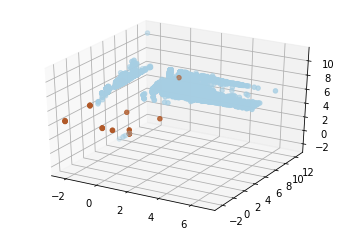

In [41]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0],df[1],df[2],c=df['label'],cmap='Paired')
#ax.scatter(df[0],df[1],df[2],cmap='Paired')

In [42]:
df.describe()

,0,1,2,label
count,95156.000000,95156.000000,95156.000000,95156.000000
mean,-0.668439,7.190579,5.858137,0.000315
std,1.762620,0.630525,0.234866,0.017753
min,-2.302585,-2.302585,-2.302585,0.000000
25%,-2.302585,6.800281,5.796362,0.000000
50%,0.095310,7.101758,5.805436,0.000000
75%,0.741937,7.439618,5.820380,0.000000
max,6.815750,12.432320,10.902723,1.000000


In [43]:
from sklearn.cluster import DBSCAN
#from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import train_test_split

In [44]:
df2 = df.drop(['label'],axis=1).values
df2.shape

(95156, 3)

In [45]:
#clustering = DBSCAN(eps=1, min_samples=2).fit(df2)

# แบ่งกลุ่ม Train Test เนื่องจาก Ram ไม่พอ

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df2, df['label'].values, test_size=0.33, random_state=42)

In [47]:
pd.DataFrame(y_test)[0].value_counts()
pd.DataFrame(y_train)[0].value_counts()

0    63733
1       21
Name: 0, dtype: int64

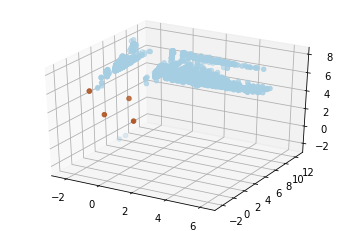

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test.T[0],X_test.T[1],X_test.T[2],c=y_test,cmap='Paired')

In [49]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(X_test)

In [50]:
clustering.labels_

array([0, 0, 1, ..., 1, 1, 0])

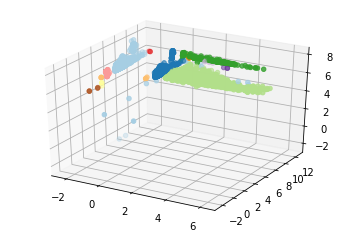

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test.T[0],X_test.T[1],X_test.T[2],c=clustering.labels_,cmap='Paired')

In [52]:
cluster = pd.DataFrame(clustering.labels_)[0].value_counts()
cluster

 0     15482
 2      8198
 1      7154
 3       432
 4        93
-1        13
 8         5
 9         4
 7         4
 6         4
 11        3
 10        3
 5         3
 13        2
 12        2
Name: 0, dtype: int64

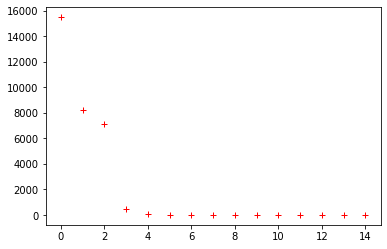

In [53]:
plt.plot(cluster.values,'r+')

In [54]:
result = []
for i in clustering.labels_:
  if i == -1:
    result.append(1)
  else:
    result.append(0)

In [55]:
len(X_test)

31402

In [56]:
y_test[y_test  == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [58]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31393
           1       0.23      0.33      0.27         9

    accuracy                           1.00     31402
   macro avg       0.62      0.67      0.64     31402
weighted avg       1.00      1.00      1.00     31402



In [59]:
tn, fp, fn, tp = confusion_matrix(y_test,result).ravel()

In [60]:
print(tn, fp, fn, tp)

31383 10 6 3
